In [1]:
import pandas as pd #the csv reading library
import matplotlib.pyplot as plt #the ploting library
import glob #to get file names
import numpy as np
from pandas import Series
import seaborn as sns
from matplotlib.pyplot import figure
import cmocean.cm as cmo
import seaborn as sns

In [2]:
df = pd.read_csv('../Dissertation_projects/Data/river_discharge/USGS_07374525_Mississippi_River_Belle_Chasse_LA.txt', 
                 index_col=0, skiprows=28, delim_whitespace=True)
df = df.drop('5s')

#Discharge, cubic feet per second (Mean)
df['Discharge'] = df['61182_00060_00003'].astype(float)
df['cd'] = df['61182_00060_00003_cd']
df = df.drop('61182_00060_00003', axis=1)
df = df.drop('61182_00060_00003_cd', axis=1)

df['datetime'] = pd.to_datetime(df['datetime'])

df

,site_no,datetime,Discharge,cd
agency_cd,,,,
USGS,07374525,2021-01-01,430000.0,A
USGS,07374525,2021-01-02,430000.0,A
USGS,07374525,2021-01-03,438000.0,A
USGS,07374525,2021-01-04,454000.0,A
USGS,07374525,2021-01-05,494000.0,A
...,...,...,...,...
USGS,07374525,2022-12-27,484000.0,A
USGS,07374525,2022-12-28,455000.0,A
USGS,07374525,2022-12-29,435000.0,A


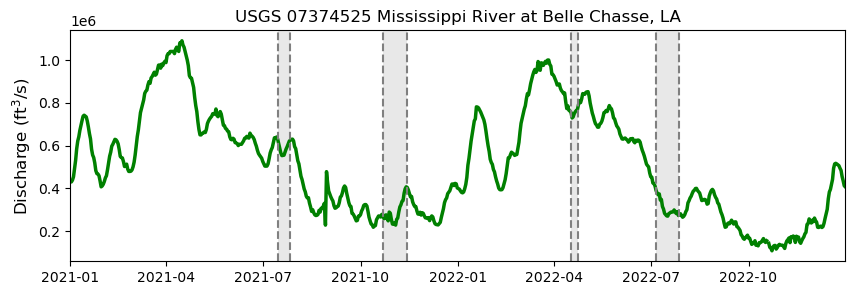

508119.34156378603


In [3]:
# Plotting
plt.figure(figsize=(10, 3))
plt.plot(df['datetime'], df['Discharge'], label='Discharge', color='green', linewidth=2.5)

plt.axvline(x=pd.to_datetime('2021-07-15'), color='grey', linestyle='--', label='July 15, 2021')
plt.axvline(x=pd.to_datetime('2021-07-27'), color='grey', linestyle='--', label='July 27, 2021')
plt.axvline(x=pd.to_datetime('2021-10-22'), color='grey', linestyle='--', label='July 15, 2021')
plt.axvline(x=pd.to_datetime('2021-11-14'), color='grey', linestyle='--', label='July 27, 2021')
plt.axvline(x=pd.to_datetime('2022-04-17'), color='grey', linestyle='--', label='July 15, 2021')
plt.axvline(x=pd.to_datetime('2022-04-24'), color='grey', linestyle='--', label='July 27, 2021')
plt.axvline(x=pd.to_datetime('2022-07-06'), color='grey', linestyle='--', label='July 15, 2021')
plt.axvline(x=pd.to_datetime('2022-07-28'), color='grey', linestyle='--', label='July 27, 2021')

# Shade the area between the two dates with transparent light grey
plt.axvspan(pd.to_datetime('2021-07-15'), pd.to_datetime('2021-07-27'), facecolor='lightgrey', alpha=0.5)
plt.axvspan(pd.to_datetime('2021-10-22'), pd.to_datetime('2021-11-14'), facecolor='lightgrey', alpha=0.5)
plt.axvspan(pd.to_datetime('2022-04-17'), pd.to_datetime('2022-04-24'), facecolor='lightgrey', alpha=0.5)
plt.axvspan(pd.to_datetime('2022-07-06'), pd.to_datetime('2022-07-28'), facecolor='lightgrey', alpha=0.5)

plt.title('USGS 07374525 Mississippi River at Belle Chasse, LA')
plt.ylabel('Discharge ($\mathrm{ft^3/s}$)', fontsize=12)  # LaTeX formatting for units

# Set x-axis limits
plt.xlim(df['datetime'].min(), df['datetime'].max())


# Remove y-axis label
plt.savefig('../Dissertation_projects/Figures/OSM_figures/discharge_plot_mi.png')
plt.show()

river_ft3_per_second = df['Discharge'].mean()

print(df['Discharge'].mean())

df_dis = df 
df_mi = df

In [4]:
df = pd.read_csv('../Dissertation_projects/Data/river_discharge/USGS_07381000_Bayou_Lafourche_at_Thibodaux_LA.txt', 
                 index_col=0, skiprows=27, delim_whitespace=True)

#Discharge, cubic feet per second (Mean)
df['Discharge'] = df['167813_00060'].astype(float)
df['cd'] = df['167813_00060_cd']
df['time'] = df['datetime']

df = df.drop('167813_00060', axis=1)
df = df.drop('167813_00060_cd', axis=1)
df = df.drop('datetime', axis=1)

df['datetime'] = pd.to_datetime(df['site_no'])  

avg_discharge_by_date = df.groupby(df['datetime'].dt.date)['Discharge'].mean()
df = avg_discharge_by_date.reset_index(name='average_discharge')
df['Discharge'] = df['average_discharge']

df_af = df

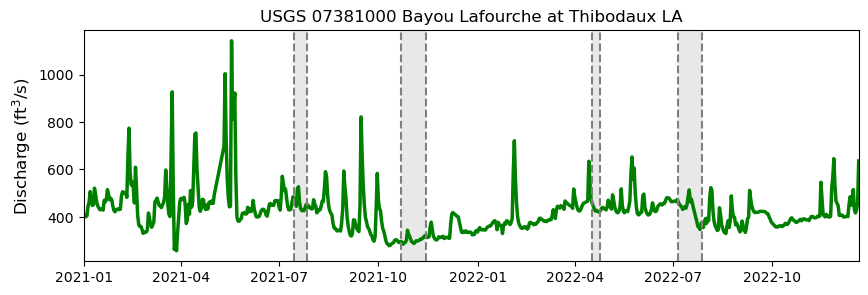

In [5]:
# Plotting
plt.figure(figsize=(10, 3))
plt.plot(df['datetime'], df['Discharge'], label='Discharge', color='green', linewidth=2.5)

plt.axvline(x=pd.to_datetime('2021-07-15'), color='grey', linestyle='--', label='July 15, 2021')
plt.axvline(x=pd.to_datetime('2021-07-27'), color='grey', linestyle='--', label='July 27, 2021')
plt.axvline(x=pd.to_datetime('2021-10-22'), color='grey', linestyle='--', label='July 15, 2021')
plt.axvline(x=pd.to_datetime('2021-11-14'), color='grey', linestyle='--', label='July 27, 2021')
plt.axvline(x=pd.to_datetime('2022-04-17'), color='grey', linestyle='--', label='July 15, 2021')
plt.axvline(x=pd.to_datetime('2022-04-24'), color='grey', linestyle='--', label='July 27, 2021')
plt.axvline(x=pd.to_datetime('2022-07-06'), color='grey', linestyle='--', label='July 15, 2021')
plt.axvline(x=pd.to_datetime('2022-07-28'), color='grey', linestyle='--', label='July 27, 2021')

# Shade the area between the two dates with transparent light grey
plt.axvspan(pd.to_datetime('2021-07-15'), pd.to_datetime('2021-07-27'), facecolor='lightgrey', alpha=0.5)
plt.axvspan(pd.to_datetime('2021-10-22'), pd.to_datetime('2021-11-14'), facecolor='lightgrey', alpha=0.5)
plt.axvspan(pd.to_datetime('2022-04-17'), pd.to_datetime('2022-04-24'), facecolor='lightgrey', alpha=0.5)
plt.axvspan(pd.to_datetime('2022-07-06'), pd.to_datetime('2022-07-28'), facecolor='lightgrey', alpha=0.5)

plt.title('USGS 07381000 Bayou Lafourche at Thibodaux LA')
plt.ylabel('Discharge ($\mathrm{ft^3/s}$)', fontsize=12)  # LaTeX formatting for units

# Set x-axis limits
plt.xlim(df['datetime'].min(), df['datetime'].max())


# Remove y-axis label
plt.savefig('../Dissertation_projects/Figures/OSM_figures/discharge_plot_al.png')
plt.show()


1.050842105263158


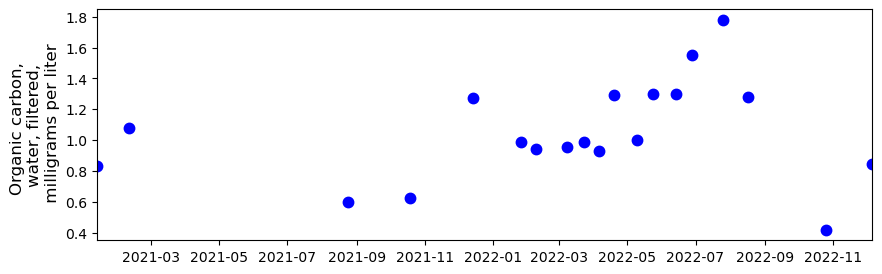

In [6]:
df = pd.read_csv('../Dissertation_projects/Data/river_discharge/USGS_Lab_data_Mississippi_River_Belle_Chasse_LA_edit.txt', 
                 index_col=0, delim_whitespace=True)

df = df[df['coll_ent_cd'] == '00618']
df['datetime'] = pd.to_datetime(df['sample_dt'])  
df['medium_cd'] = df['medium_cd'].astype(float)

plt.figure(figsize=(10, 3))

plt.scatter(df['datetime'], df['medium_cd'], label='Organic carbon, water, filtered, milligrams per liter', color='blue', linewidth=2.5)
plt.xlim(df['datetime'].min(), df['datetime'].max())
plt.ylabel(r'Organic carbon, '+'\n'+'water, filtered,'+'\n'+' milligrams per liter', fontsize=12)  # LaTeX formatting for units

oc_mg_per_liter = df['medium_cd'].mean()

print(df['medium_cd'].mean())

df_oc = df 

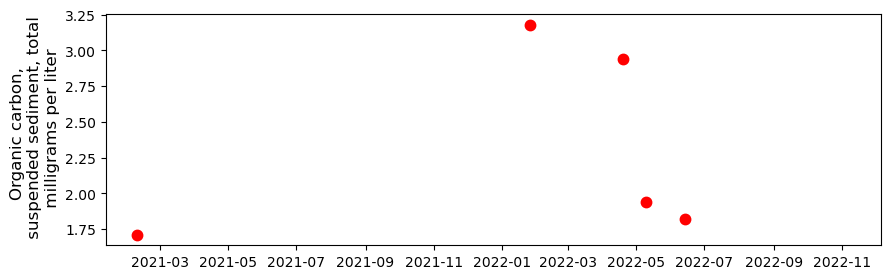

In [7]:
df = pd.read_csv('../Dissertation_projects/Data/river_discharge/USGS_Lab_data_Mississippi_River_Belle_Chasse_LA_edit.txt', 
                 index_col=0, delim_whitespace=True)

df = df[df['coll_ent_cd'] == '00689']
df['datetime'] = pd.to_datetime(df['sample_dt'])  
df['medium_cd'] = pd.to_numeric(df['medium_cd'], errors='coerce')

plt.figure(figsize=(10, 3))

plt.scatter(df['datetime'], df['medium_cd'], label='Organic carbon, water, filtered, milligrams per liter', color='red', linewidth=2.5)
plt.xlim(df['datetime'].min(), df['datetime'].max())
plt.ylabel(r'Organic carbon, '+'\n'+' suspended sediment, total'+'\n'+' milligrams per liter', fontsize=12)  # LaTeX formatting for units

df_sed = df 

(18639.0, 19332.0)

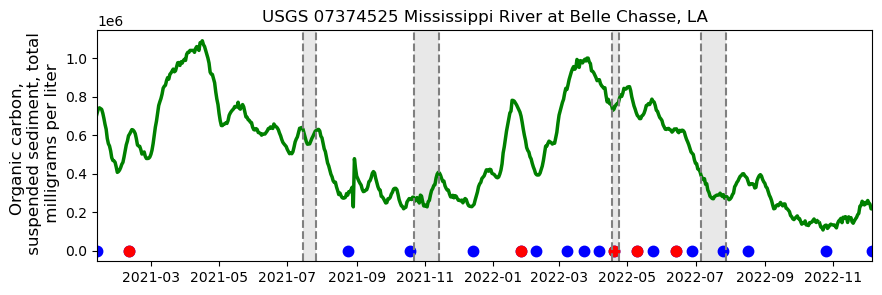

In [8]:
# Plotting
plt.figure(figsize=(10, 3))
plt.plot(df_dis['datetime'], df_dis['Discharge'], label='Discharge', color='green', linewidth=2.5)

plt.axvline(x=pd.to_datetime('2021-07-15'), color='grey', linestyle='--', label='July 15, 2021')
plt.axvline(x=pd.to_datetime('2021-07-27'), color='grey', linestyle='--', label='July 27, 2021')
plt.axvline(x=pd.to_datetime('2021-10-22'), color='grey', linestyle='--', label='July 15, 2021')
plt.axvline(x=pd.to_datetime('2021-11-14'), color='grey', linestyle='--', label='July 27, 2021')
plt.axvline(x=pd.to_datetime('2022-04-17'), color='grey', linestyle='--', label='July 15, 2021')
plt.axvline(x=pd.to_datetime('2022-04-24'), color='grey', linestyle='--', label='July 27, 2021')
plt.axvline(x=pd.to_datetime('2022-07-06'), color='grey', linestyle='--', label='July 15, 2021')
plt.axvline(x=pd.to_datetime('2022-07-28'), color='grey', linestyle='--', label='July 27, 2021')

# Shade the area between the two dates with transparent light grey
plt.axvspan(pd.to_datetime('2021-07-15'), pd.to_datetime('2021-07-27'), facecolor='lightgrey', alpha=0.5)
plt.axvspan(pd.to_datetime('2021-10-22'), pd.to_datetime('2021-11-14'), facecolor='lightgrey', alpha=0.5)
plt.axvspan(pd.to_datetime('2022-04-17'), pd.to_datetime('2022-04-24'), facecolor='lightgrey', alpha=0.5)
plt.axvspan(pd.to_datetime('2022-07-06'), pd.to_datetime('2022-07-28'), facecolor='lightgrey', alpha=0.5)

plt.title('USGS 07374525 Mississippi River at Belle Chasse, LA')
plt.ylabel('Discharge ($\mathrm{ft^3/s}$)', fontsize=12)  # LaTeX formatting for units

plt.scatter(df_oc['datetime'], df_oc['medium_cd'], label='Organic carbon, water, filtered, milligrams per liter', color='blue', linewidth=2.5)
plt.xlim(df_oc['datetime'].min(), df_oc['datetime'].max())
plt.ylabel(r'Organic carbon, '+'\n'+'water, filtered,'+'\n'+' milligrams per liter', fontsize=12)  # LaTeX formatting for units

plt.scatter(df_sed['datetime'], df_sed['medium_cd'], label='Organic carbon, water, filtered, milligrams per liter', color='red', linewidth=2.5)
plt.xlim(df_sed['datetime'].min(), df_sed['datetime'].max())
plt.ylabel(r'Organic carbon, '+'\n'+' suspended sediment, total'+'\n'+' milligrams per liter', fontsize=12) 

# Set x-axis limits
plt.xlim(df['datetime'].min(), df['datetime'].max())

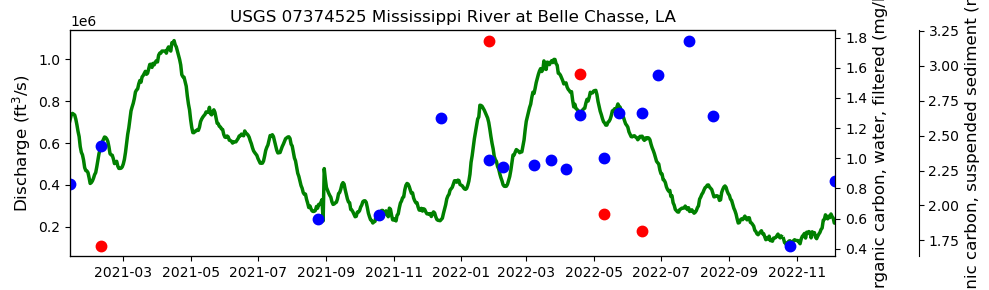

In [9]:

# Create figure and primary y-axis
fig, ax1 = plt.subplots(figsize=(10, 3))

# Plot Discharge on the primary y-axis
ax1.plot(df_dis['datetime'], df_dis['Discharge'], label='Discharge', color='green', linewidth=2.5)
ax1.set_ylabel('Discharge ($\mathrm{ft^3/s}$)', fontsize=12)

# Create secondary y-axis for Organic Carbon
ax2 = ax1.twinx()
ax2.scatter(df_oc['datetime'], df_oc['medium_cd'], label='Organic carbon, water, filtered', color='blue', linewidth=2.5)
ax2.set_ylabel('Organic carbon, water, filtered (mg/L)', fontsize=12)

# Create third y-axis for Suspended Sediment
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Move the axis to the right
ax3.scatter(df_sed['datetime'], df_sed['medium_cd'], label='Organic carbon, suspended sediment', color='red', linewidth=2.5)
ax3.set_ylabel('Organic carbon, suspended sediment (mg/L)', fontsize=12)

# Set x-axis limits
plt.xlim(df['datetime'].min(), df['datetime'].max())

# Title and legend
plt.title('USGS 07374525 Mississippi River at Belle Chasse, LA')
fig.tight_layout()  # Adjust layout for better spacing
plt.show()


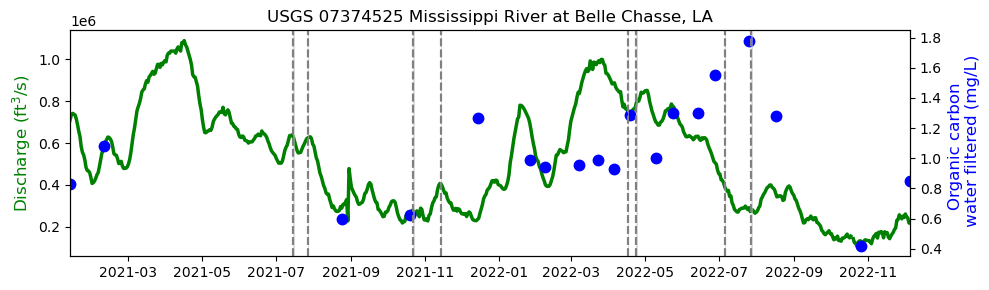

In [10]:
import matplotlib.pyplot as plt

# Create figure and primary y-axis
fig, ax1 = plt.subplots(figsize=(10, 3))

# Plot Discharge on the primary y-axis
ax1.plot(df_dis['datetime'], df_dis['Discharge'], label='Discharge', color='green', linewidth=2.5)
ax1.set_ylabel('Discharge ($\mathrm{ft^3/s}$)', fontsize=12, color = 'green')

# Create secondary y-axis for Organic Carbon
ax2 = ax1.twinx()
ax2.scatter(df_oc['datetime'], df_oc['medium_cd'], label='Organic carbon, water, filtered', color='blue', linewidth=2.5)
ax2.set_ylabel(r'Organic carbon '+'\n'+' water filtered (mg/L)', fontsize=12, color = 'blue')

# Vertical lines and shaded areas
events = ['2021-07-15', '2021-07-27', '2021-10-22', '2021-11-14', '2022-04-17', '2022-04-24', '2022-07-06', '2022-07-28']
for event in events:
    ax1.axvline(x=pd.to_datetime(event), color='grey', linestyle='--', label=event)
    ax2.axvline(x=pd.to_datetime(event), color='grey', linestyle='--')
    ax3.axvline(x=pd.to_datetime(event), color='grey', linestyle='--')
    
    # Shade the area between the two dates with transparent light grey
    ax1.axvspan(pd.to_datetime(event), pd.to_datetime(event) + pd.DateOffset(days=1), facecolor='lightgrey', alpha=0.5)
    ax2.axvspan(pd.to_datetime(event), pd.to_datetime(event) + pd.DateOffset(days=1), facecolor='lightgrey', alpha=0.5)
    ax3.axvspan(pd.to_datetime(event), pd.to_datetime(event) + pd.DateOffset(days=1), facecolor='lightgrey', alpha=0.5)

# Set x-axis limits
plt.xlim(df['datetime'].min(), df['datetime'].max())

# Title and legend
plt.title('USGS 07374525 Mississippi River at Belle Chasse, LA')
fig.tight_layout()  # Adjust layout for better spacing
plt.show()


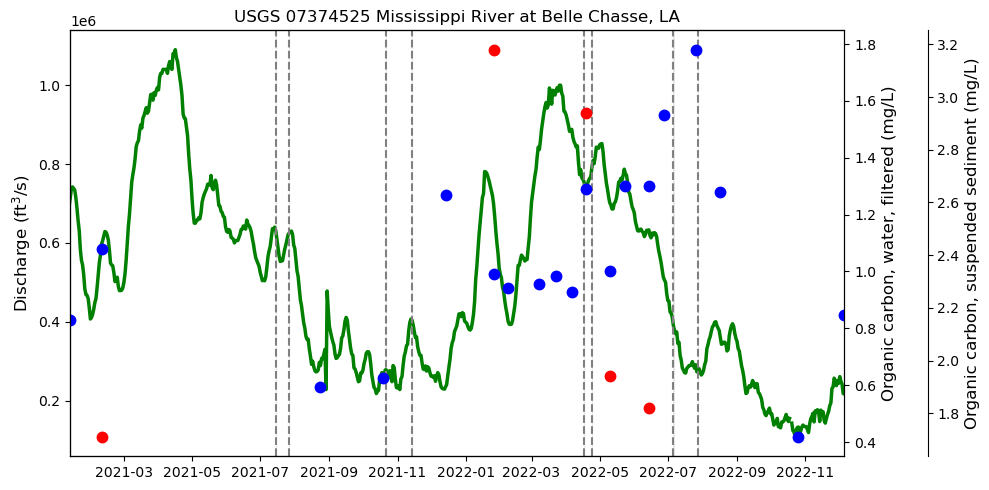

In [11]:
import matplotlib.pyplot as plt

# Create figure and primary y-axis
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot Discharge on the primary y-axis
ax1.plot(df_dis['datetime'], df_dis['Discharge'], label='Discharge', color='green', linewidth=2.5)
ax1.set_ylabel('Discharge ($\mathrm{ft^3/s}$)', fontsize=12)

# Create secondary y-axis for Organic Carbon
ax2 = ax1.twinx()
ax2.scatter(df_oc['datetime'], df_oc['medium_cd'], label='Organic carbon, water, filtered', color='blue', linewidth=2.5)
ax2.set_ylabel('Organic carbon, water, filtered (mg/L)', fontsize=12)

# Create third y-axis for Suspended Sediment
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Move the axis to the right
ax3.scatter(df_sed['datetime'], df_sed['medium_cd'], label='Organic carbon, suspended sediment', color='red', linewidth=2.5)
ax3.set_ylabel('Organic carbon, suspended sediment (mg/L)', fontsize=12)

# Vertical lines and shaded areas on the primary x-axis (ax1)
events = ['2021-07-15', '2021-07-27', '2021-10-22', '2021-11-14', '2022-04-17', '2022-04-24', '2022-07-06', '2022-07-28']
for event in events:
    ax1.axvline(x=pd.to_datetime(event), color='grey', linestyle='--', label=event)
    
    # Shade the area between the two dates with transparent light grey
    ax1.axvspan(pd.to_datetime(event), pd.to_datetime(event) + pd.DateOffset(days=1), facecolor='lightgrey', alpha=0.5)

# Set x-axis limits
plt.xlim(df['datetime'].min(), df['datetime'].max())

# Title and legend
plt.title('USGS 07374525 Mississippi River at Belle Chasse, LA')
fig.tight_layout()  # Adjust layout for better spacing
plt.show()


In [12]:
oc_mg_per_liter
river_ft3_per_second

river_liter_per_second = river_ft3_per_second*28.317
river_liter_per_year = river_liter_per_second*60*60*24*365

oc_metton_per_liter = oc_mg_per_liter / 1e+9

oc_ton_per_year = oc_metton_per_liter * river_liter_per_year
print('Organic Carbon input ton / year:', oc_ton_per_year)

Organic Carbon input ton / year: 476822.8291402517


In [13]:
df_oc

,site_no,sample_dt,sample_tm,sample_end_dt,sample_end_tm,sample_start_time_datum_cd,tm_datum_rlbty_cd,coll_ent_cd,medium_cd,tu_id,...,remark_cd,result_va,val_qual_tx,meth_cd,dqi_cd,rpt_lev_va,rpt_lev_cd,lab_std_va,anl_ent_cd,datetime
agency_cd,,,,,,,,,,,,,,,,,,,,,
USGS,7374525,2021-01-12,11:00,CST,K,USGS,WS,00618,0.830,ALGOR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-12
USGS,7374525,2021-02-09,11:00,CST,K,USGS,WS,00618,1.080,ALGOR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-02-09
USGS,7374525,2021-08-24,12:00,CDT,K,USGS,WS,00618,0.595,ALGOR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-08-24
USGS,7374525,2021-10-19,11:00,CDT,K,USGS,WS,00618,0.626,ALGOR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-10-19
USGS,7374525,2021-12-14,12:00,CST,K,USGS,WS,00618,1.270,ALGOR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-14
USGS,7374525,2022-01-26,11:00,CST,K,USGS,WS,00618,0.990,ALGOR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-01-26
USGS,7374525,2022-02-08,11:00,CST,K,USGS,WS,00618,0.943,ALGOR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-02-08
USGS,7374525,2022-03-08,11:00,CST,K,USGS,WS,00618,0.955,ALGOR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-08
USGS,7374525,2022-03-23,11:00,CDT,K,USGS,WS,00618,0.985,ALGOR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-23


In [14]:
df_mi['Discharge_7'] = df_mi['Discharge'].rolling(window=7, min_periods=1).sum()
df_mi['Discharge_14'] = df_mi['Discharge'].rolling(window=14, min_periods=1).sum()
df_mi['Discharge_30'] = df_mi['Discharge'].rolling(window=30, min_periods=1).sum()
df_mi['Discharge_60'] = df_mi['Discharge'].rolling(window=60, min_periods=1).sum()
df_mi['Discharge_90'] = df_mi['Discharge'].rolling(window=90, min_periods=1).sum()

df_mi

,site_no,datetime,Discharge,cd,Discharge_7,Discharge_14,Discharge_30,Discharge_60,Discharge_90
agency_cd,,,,,,,,,
USGS,07374525,2021-01-01,430000.0,A,430000.0,430000.0,430000.0,430000.0,430000.0
USGS,07374525,2021-01-02,430000.0,A,860000.0,860000.0,860000.0,860000.0,860000.0
USGS,07374525,2021-01-03,438000.0,A,1298000.0,1298000.0,1298000.0,1298000.0,1298000.0
USGS,07374525,2021-01-04,454000.0,A,1752000.0,1752000.0,1752000.0,1752000.0,1752000.0
USGS,07374525,2021-01-05,494000.0,A,2246000.0,2246000.0,2246000.0,2246000.0,2246000.0
...,...,...,...,...,...,...,...,...,...
USGS,07374525,2022-12-27,484000.0,A,3539000.0,6325000.0,10154000.0,15091000.0,19258000.0
USGS,07374525,2022-12-28,455000.0,A,3480000.0,6478000.0,10360000.0,15413000.0,19538000.0
USGS,07374525,2022-12-29,435000.0,A,3398000.0,6562000.0,10557000.0,15710000.0,19792000.0


In [15]:
df_af['Discharge_7'] = df_af['Discharge'].rolling(window=7, min_periods=1).sum()
df_af['Discharge_14'] = df_af['Discharge'].rolling(window=14, min_periods=1).sum()
df_af['Discharge_30'] = df_af['Discharge'].rolling(window=30, min_periods=1).sum()
df_af['Discharge_60'] = df_af['Discharge'].rolling(window=60, min_periods=1).sum()
df_af['Discharge_90'] = df_af['Discharge'].rolling(window=90, min_periods=1).sum()

df_af

,datetime,average_discharge,Discharge,Discharge_7,Discharge_14,Discharge_30,Discharge_60,Discharge_90
0,2021-01-01,406.947917,406.947917,406.947917,406.947917,406.947917,406.947917,406.947917
1,2021-01-02,409.531250,409.531250,816.479167,816.479167,816.479167,816.479167,816.479167
2,2021-01-03,400.625000,400.625000,1217.104167,1217.104167,1217.104167,1217.104167,1217.104167
3,2021-01-04,404.364583,404.364583,1621.468750,1621.468750,1621.468750,1621.468750,1621.468750
4,2021-01-05,444.760417,444.760417,2066.229167,2066.229167,2066.229167,2066.229167,2066.229167
...,...,...,...,...,...,...,...,...
701,2022-12-16,431.416667,431.416667,3209.677083,6035.802083,13316.188301,25208.854159,36999.008679
702,2022-12-17,416.989583,416.989583,3225.218750,6046.041667,13320.062500,25242.208326,36994.019096
703,2022-12-18,430.093750,430.093750,3204.302083,6067.416667,13346.125000,25279.166659,37005.675346
704,2022-12-19,456.875000,456.875000,3176.218750,6118.197917,13402.791667,25339.562492,37042.831596


In [16]:
df_o2 = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/O2_Summary_Stats.csv', sep=',', index_col=0)
df_o2

df_dates = df_o2['date']
#df_dates['Date'] = df_dates['date'].pd.datetime
df_dates = pd.DataFrame(df_dates)

df_dates['date'] = pd.to_datetime(df_dates['date'])

df_dates['code'] = df_dates.index

df_dates

,date,code
code,,
St.11_GOM2021,2021-07-25,St.11_GOM2021
St.13_GOM2021,2021-07-21,St.13_GOM2021
St.14_GOM2021,2021-07-19,St.14_GOM2021
St.15_GOM2021,2021-07-23,St.15_GOM2021
St.16_GOM2021,2021-07-24,St.16_GOM2021
St.2_GOM2021,2021-07-22,St.2_GOM2021
St.4_GOM2021,2021-07-17,St.4_GOM2021
St.5B_GOM2021,2021-07-16,St.5B_GOM2021
St.7_GOM2021,2021-07-26,St.7_GOM2021


In [17]:
merged_df = pd.merge(df_dates, df_mi, left_on='date', right_on='datetime', how='inner')
merged_df['discharge_mi_ftps'] = merged_df['Discharge']
merged_df['discharge_mi_ftps_seven_day'] = merged_df['Discharge_7']
merged_df['discharge_mi_ftps_14_day'] = merged_df['Discharge_14']
merged_df['discharge_mi_ftps_30_day'] = merged_df['Discharge_30']
merged_df['discharge_mi_ftps_60_day'] = merged_df['Discharge_60']
merged_df['discharge_mi_ftps_90_day'] = merged_df['Discharge_90']

merged_df = merged_df[['date', 'code', 'discharge_mi_ftps', 'discharge_mi_ftps_seven_day', 
                       'discharge_mi_ftps_14_day', 'discharge_mi_ftps_30_day', 
                       'discharge_mi_ftps_60_day', 'discharge_mi_ftps_90_day']]
merged_df = pd.DataFrame(merged_df)

merged_df['date'] = pd.to_datetime(merged_df['date'])
df_af['datetime'] = pd.to_datetime(df_af['datetime'])

merged_df = pd.merge(merged_df, df_af, left_on='date', right_on='datetime', how='inner')
merged_df['discharge_af_ftps'] = merged_df['Discharge']
merged_df['discharge_af_ftps_seven_day'] = merged_df['Discharge_7']
merged_df['discharge_af_ftps_14_day'] = merged_df['Discharge_14']
merged_df['discharge_af_ftps_30_day'] = merged_df['Discharge_30']
merged_df['discharge_af_ftps_60_day'] = merged_df['Discharge_60']
merged_df['discharge_af_ftps_90_day'] = merged_df['Discharge_90']



merged_df = merged_df[['date', 'code', 'discharge_mi_ftps', 'discharge_af_ftps',
                       'discharge_mi_ftps_seven_day', 'discharge_af_ftps_seven_day', 
                       'discharge_mi_ftps_14_day', 'discharge_mi_ftps_30_day', 
                       'discharge_mi_ftps_60_day', 'discharge_mi_ftps_90_day', 
                      'discharge_af_ftps_14_day', 'discharge_af_ftps_30_day', 
                       'discharge_af_ftps_60_day', 'discharge_af_ftps_90_day']]

merged_df.index = merged_df['code']
merged_df = merged_df[['date', 'discharge_mi_ftps', 'discharge_af_ftps',
                       'discharge_mi_ftps_seven_day', 'discharge_af_ftps_seven_day', 
                       'discharge_mi_ftps_14_day', 'discharge_mi_ftps_30_day', 
                       'discharge_mi_ftps_60_day', 'discharge_mi_ftps_90_day', 
                      'discharge_af_ftps_14_day', 'discharge_af_ftps_30_day', 
                       'discharge_af_ftps_60_day', 'discharge_af_ftps_90_day']]
merged_df.to_csv('../Dissertation_projects/Data/Stats_data_sets/river_discharge_date.csv')

merged_df

,date,discharge_mi_ftps,discharge_af_ftps,discharge_mi_ftps_seven_day,discharge_af_ftps_seven_day,discharge_mi_ftps_14_day,discharge_mi_ftps_30_day,discharge_mi_ftps_60_day,discharge_mi_ftps_90_day,discharge_af_ftps_14_day,discharge_af_ftps_30_day,discharge_af_ftps_60_day,discharge_af_ftps_90_day
code,,,,,,,,,,,,,
St.11_GOM2021,2021-07-25,608000.0,437.666667,4018000.0,3142.446473,8320000.0,17062000.0,36009000.0,57719000.0,6409.548177,14010.954427,26735.531466,43308.420276
St.13_GOM2021,2021-07-21,555000.0,435.406250,4053000.0,3310.197917,8313000.0,17180000.0,36510000.0,59015000.0,6474.914205,14102.872538,26567.897493,43902.734220
St.14_GOM2021,2021-07-19,553000.0,527.416667,4219000.0,3362.028788,8256000.0,17363000.0,36909000.0,59880000.0,6606.945455,14035.872538,27158.084993,44365.515470
St.15_GOM2021,2021-07-23,584000.0,428.414894,3966000.0,3241.633644,8321000.0,17067000.0,36194000.0,58324000.0,6405.766598,14047.485348,26641.604053,43404.732447
St.16_GOM2021,2021-07-24,595000.0,426.031579,3976000.0,3222.831889,8325000.0,17051000.0,36094000.0,58004000.0,6401.871094,14024.235677,26685.666882,43313.441109
St.2_GOM2021,2021-07-22,569000.0,426.635417,3991000.0,3276.697917,8317000.0,17111000.0,36332000.0,58657000.0,6422.497538,14075.862121,26595.887076,43575.536303
St.4_GOM2021,2021-07-17,585000.0,444.833333,4349000.0,3179.039205,8148000.0,17537000.0,37265000.0,60821000.0,6672.653788,13822.278788,27780.730826,44226.171939
St.5B_GOM2021,2021-07-16,609000.0,463.479167,4355000.0,3164.132955,8067000.0,17589000.0,37451000.0,61296000.0,6712.195455,13808.435038,28478.164160,44292.505272
St.7_GOM2021,2021-07-26,621000.0,452.468750,4086000.0,3067.498556,8305000.0,17105000.0,35950000.0,57468000.0,6429.527344,14014.891927,26795.198132,43337.211942


In [26]:
df_mi['dis_mi'] = df_mi['Discharge']
df_af['dis_af'] = df_af['Discharge']

df_ratio = pd.merge(df_mi, df_af, left_on='datetime', right_on='datetime', how='inner')
df_ratio['ratio'] = df_ratio['dis_mi'] / df_ratio['dis_af']
df_ratio['ratio_norm'] = df_ratio['ratio'] / df_ratio['ratio'].mean()
df_ratio['total_dis'] = df_ratio['dis_af'] + df_ratio['dis_mi']



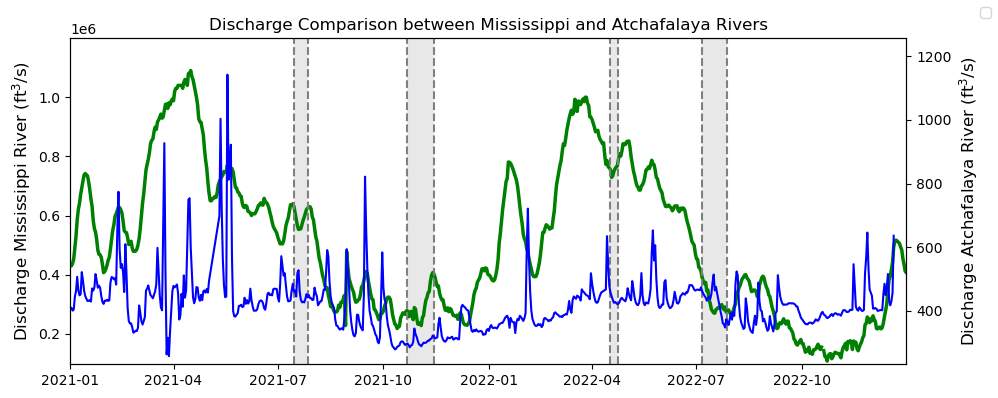

In [27]:
# Create figure and primary y-axis
fig, ax1 = plt.subplots(figsize=(10, 4))

# Plot Discharge on the primary y-axis for Mississippi River
ax1.plot(df_mi['datetime'], df_mi['Discharge'], label='Mississippi River Discharge', color='green', linewidth=2.5)
ax1.set_ylabel('Discharge Mississippi River ($\mathrm{ft^3/s}$)', fontsize=12)

# Create secondary y-axis for Atchafalaya River
ax2 = ax1.twinx()
ax2.plot(df_af['datetime'], df_af['Discharge'], label='Atchafalaya River Discharge', color='blue', linewidth=1.5)
ax2.set_ylabel('Discharge Atchafalaya River ($\mathrm{ft^3/s}$)', fontsize=12)

# Set limits for both y-axes
ax1.set_ylim(df_mi['Discharge'].min()*.9, df_mi['Discharge'].max()*1.1)
ax2.set_ylim(df_af['Discharge'].min()*.9, df_af['Discharge'].max()*1.1)

# Set limits for x-axis based on data
ax1.set_xlim(df_mi['datetime'].min(), df_mi['datetime'].max())

# Add vertical lines for important dates
important_dates = [
    '2021-07-15', '2021-07-27', '2021-10-22', '2021-11-14',
    '2022-04-17', '2022-04-24', '2022-07-06', '2022-07-28'
]

for date in important_dates:
    ax1.axvline(x=pd.to_datetime(date), color='grey', linestyle='--')

# Shade the area between the two dates with transparent light grey
ax1.axvspan(pd.to_datetime('2021-07-15'), pd.to_datetime('2021-07-27'), facecolor='lightgrey', alpha=0.5)
ax1.axvspan(pd.to_datetime('2021-10-22'), pd.to_datetime('2021-11-14'), facecolor='lightgrey', alpha=0.5)
ax1.axvspan(pd.to_datetime('2022-04-17'), pd.to_datetime('2022-04-24'), facecolor='lightgrey', alpha=0.5)
ax1.axvspan(pd.to_datetime('2022-07-06'), pd.to_datetime('2022-07-28'), facecolor='lightgrey', alpha=0.5)

# Title and legend
plt.title('Discharge Comparison between Mississippi and Atchafalaya Rivers')
fig.tight_layout()  # Adjust layout for better spacing
fig.legend('')
plt.show()

# Save the figure
fig.savefig('../Dissertation_projects/Figures/OSM_figures/discharge_plot_both.png')


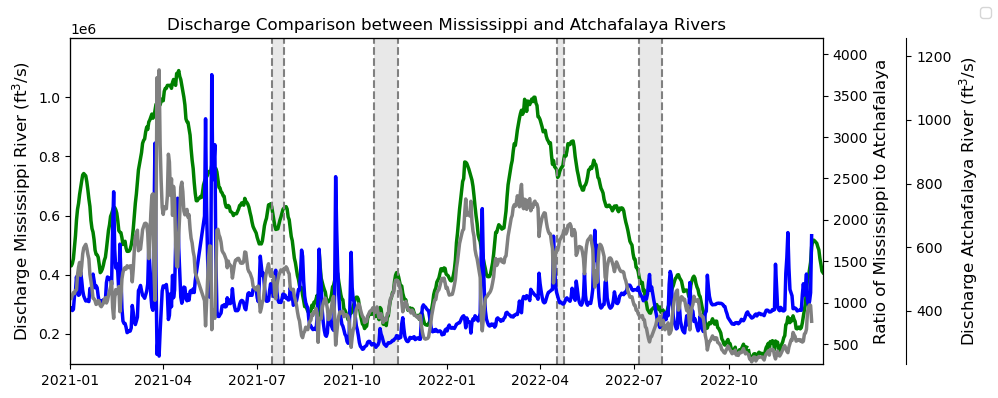

In [28]:
# Create figure and primary y-axis
fig, ax1 = plt.subplots(figsize=(10, 4))

# Plot Discharge on the primary y-axis for Mississippi River
ax1.plot(df_mi['datetime'], df_mi['Discharge'], label='Mississippi River Discharge', color='green', linewidth=2.5)
ax1.set_ylabel('Discharge Mississippi River ($\mathrm{ft^3/s}$)', fontsize=12)

# Create secondary y-axis for Atchafalaya River
ax2 = ax1.twinx()
ax2.plot(df_af['datetime'], df_af['Discharge'], label='Atchafalaya River Discharge', color='blue', linewidth=2.5)
ax2.set_ylabel('Discharge Atchafalaya River ($\mathrm{ft^3/s}$)', fontsize=12)
ax2.spines['right'].set_position(('outward', 60))  # Move the axis to the right


# Create 3rd y-axis for ratio 
ax3 = ax1.twinx()
ax3.plot(df_ratio['datetime'], df_ratio['ratio'], label='Atchafalaya River Discharge', color='grey', linewidth=2.5)
ax3.set_ylabel('Ratio of Mississippi to Atchafalaya', fontsize=12)
ax3.spines['left'].set_position(('outward', 0))  # Move the axis to the right

# Set limits for both y-axes
ax1.set_ylim(df_mi['Discharge'].min()*.9, df_mi['Discharge'].max()*1.1)
ax2.set_ylim(df_af['Discharge'].min()*.9, df_af['Discharge'].max()*1.1)
ax3.set_ylim(df_ratio['ratio'].min()*.9, df_ratio['ratio'].max()*1.1)

# Set limits for x-axis based on data
ax1.set_xlim(df_mi['datetime'].min(), df_mi['datetime'].max())

# Add vertical lines for important dates
important_dates = [
    '2021-07-15', '2021-07-27', '2021-10-22', '2021-11-14',
    '2022-04-17', '2022-04-24', '2022-07-06', '2022-07-28'
]

for date in important_dates:
    ax1.axvline(x=pd.to_datetime(date), color='grey', linestyle='--')

# Shade the area between the two dates with transparent light grey
ax1.axvspan(pd.to_datetime('2021-07-15'), pd.to_datetime('2021-07-27'), facecolor='lightgrey', alpha=0.5)
ax1.axvspan(pd.to_datetime('2021-10-22'), pd.to_datetime('2021-11-14'), facecolor='lightgrey', alpha=0.5)
ax1.axvspan(pd.to_datetime('2022-04-17'), pd.to_datetime('2022-04-24'), facecolor='lightgrey', alpha=0.5)
ax1.axvspan(pd.to_datetime('2022-07-06'), pd.to_datetime('2022-07-28'), facecolor='lightgrey', alpha=0.5)

# Title and legend
plt.title('Discharge Comparison between Mississippi and Atchafalaya Rivers')
fig.tight_layout()  # Adjust layout for better spacing
fig.legend('')
plt.show()

# Save the figure
fig.savefig('../Dissertation_projects/Figures/OSM_figures/discharge_plot_ratio.png')


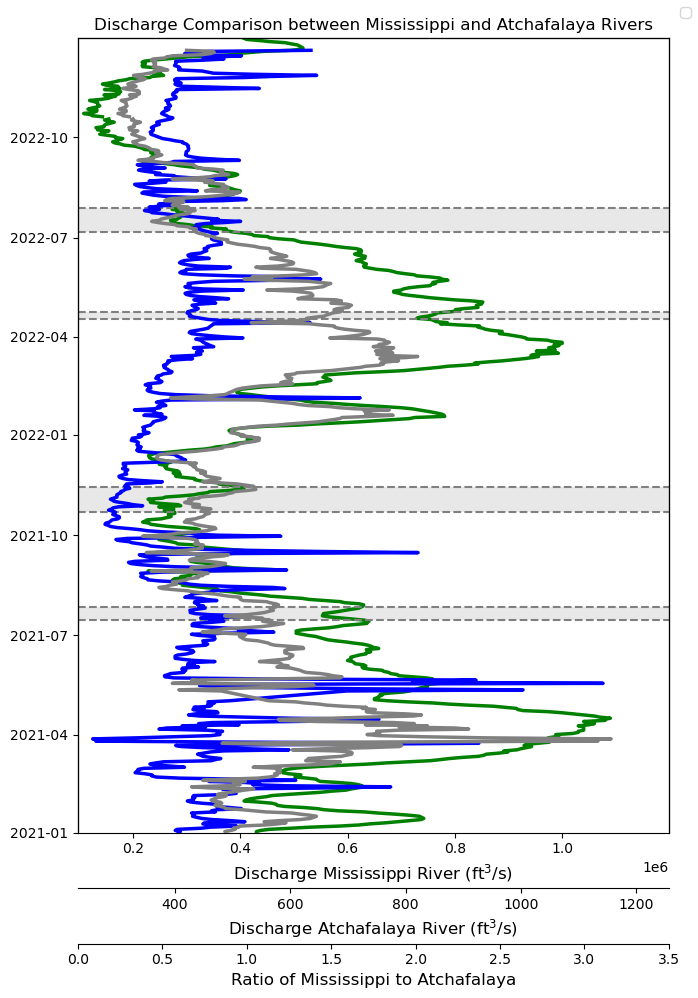

In [29]:
import matplotlib.pyplot as plt

# Create figure and primary x-axis
fig, ax1 = plt.subplots(figsize=(7, 10))

# Plot Discharge on the primary x-axis for Mississippi River
ax1.plot(df_mi['Discharge'], df_mi['datetime'], label='Mississippi River Discharge', color='green', linewidth=2.5)
ax1.set_xlabel('Discharge Mississippi River ($\mathrm{ft^3/s}$)', fontsize=12)

# Create secondary x-axis for Atchafalaya River
ax2 = ax1.twiny()
ax2.plot(df_af['Discharge'], df_af['datetime'], label='Atchafalaya River Discharge', color='blue', linewidth=2.5)
ax2.set_xlabel('Discharge Atchafalaya River ($\mathrm{ft^3/s}$)', fontsize=12)


# Create 3rd x-axis for ratio
ax3 = ax1.twiny()
ax3.plot(df_ratio['ratio_norm'], df_ratio['datetime'], label='Ratio of Mississippi to Atchafalaya', color='grey', linewidth=2.5)
ax3.set_xlabel('Ratio of Mississippi to Atchafalaya', fontsize=12)

# Set limits for both x-axes
ax1.set_xlim(df_mi['Discharge'].min()*0.9, df_mi['Discharge'].max()*1.1)
ax2.set_xlim(df_af['Discharge'].min()*0.9, df_af['Discharge'].max()*1.1)
ax3.set_xlim(0,3.5)

# Set limits for y-axis based on data
ax1.set_ylim(df_mi['datetime'].min(), df_mi['datetime'].max())

# Move spines to the bottom
ax2.xaxis.set_ticks_position('bottom')
ax2.xaxis.set_label_position('bottom')
ax2.spines['bottom'].set_position(('outward', 40))

ax3.xaxis.set_ticks_position('bottom')
ax3.xaxis.set_label_position('bottom')
ax3.spines['bottom'].set_position(('outward', 80))

# Add horizontal lines for important dates
important_dates = [
    '2021-07-15', '2021-07-27', '2021-10-22', '2021-11-14',
    '2022-04-17', '2022-04-24', '2022-07-06', '2022-07-28'
]

for date in important_dates:
    ax1.axhline(y=pd.to_datetime(date), color='grey', linestyle='--')

# Shade the area between the two dates with transparent light grey
ax1.axhspan(pd.to_datetime('2021-07-15'), pd.to_datetime('2021-07-27'), facecolor='lightgrey', alpha=0.5)
ax1.axhspan(pd.to_datetime('2021-10-22'), pd.to_datetime('2021-11-14'), facecolor='lightgrey', alpha=0.5)
ax1.axhspan(pd.to_datetime('2022-04-17'), pd.to_datetime('2022-04-24'), facecolor='lightgrey', alpha=0.5)
ax1.axhspan(pd.to_datetime('2022-07-06'), pd.to_datetime('2022-07-28'), facecolor='lightgrey', alpha=0.5)

# Title and legend
plt.title('Discharge Comparison between Mississippi and Atchafalaya Rivers')
fig.tight_layout()  # Adjust layout for better spacing
fig.legend('')
plt.show()

# Save the figure
fig.savefig('../Dissertation_projects/Figures/OSM_figures/discharge_plot_ratio_flipped.png')


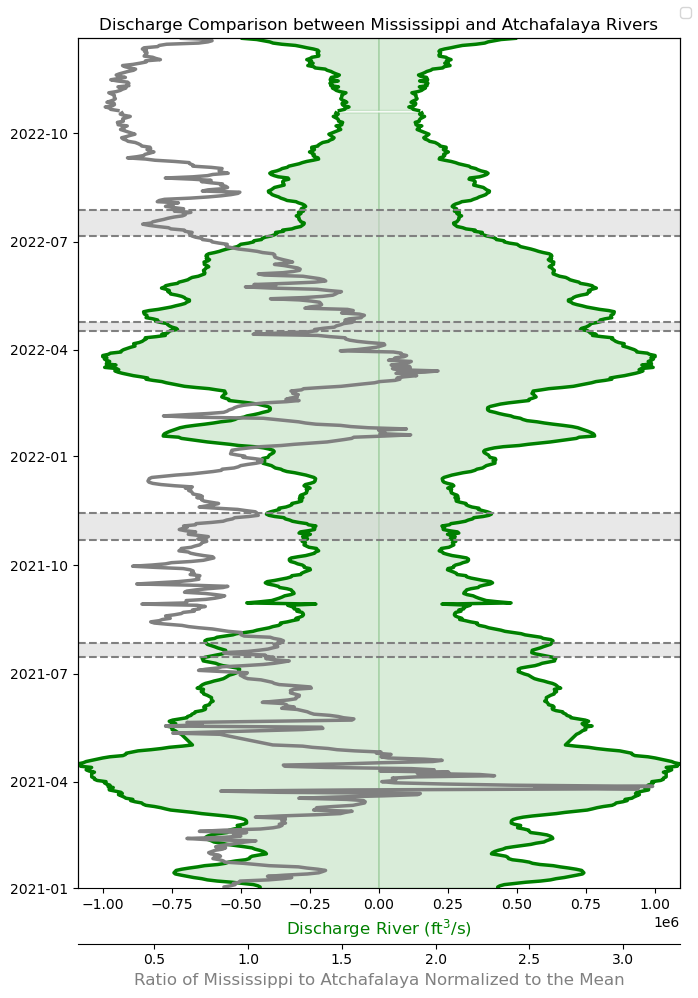

In [38]:
import matplotlib.pyplot as plt

# Create figure and primary x-axis
fig, ax1 = plt.subplots(figsize=(7, 10))

# Plot Discharge on the primary x-axis for Mississippi River
ax1.plot(df_ratio['total_dis'], df_ratio['datetime'], label='Mississippi River Discharge', color='green', linewidth=2.5)
ax1.plot(df_ratio['total_dis']*-1, df_ratio['datetime'], label='Mississippi River Discharge', color='green', linewidth=2.5)
ax1.fill_betweenx(df_ratio['datetime'], df_ratio['total_dis'], color='green', alpha=.15)
ax1.fill_betweenx(df_ratio['datetime'], -df_ratio['total_dis'], color='green', alpha=.15)
ax1.set_xlabel('Discharge River ($\mathrm{ft^3/s}$)', fontsize=12, color= 'green')


# Create 3rd x-axis for ratio
ax3 = ax1.twiny()
ax3.plot(df_ratio['ratio_norm'], df_ratio['datetime'], label='Ratio of Mississippi to Atchafalaya', color='grey', linewidth=2.5)
ax3.set_xlabel('Ratio of Mississippi to Atchafalaya Normalized to the Mean', fontsize=12, color = 'grey')

# Set limits for both x-axes
#ax1.set_xlim(df_ratio['total_dis'].min()*0.9, df_ratio['total_dis'].max()*1.1)
#ax2.set_xlim(df_af['Discharge'].min()*0.9, df_af['Discharge'].max()*1.1)
#ax3.set_xlim(0,3.5)

# Set limits for y-axis based on data
ax1.set_ylim(df_ratio['datetime'].min(), df_ratio['datetime'].max())
ax1.set_xlim(df_ratio['total_dis'].max()*-1, df_ratio['total_dis'].max())


# Move spines to the bottom
ax3.xaxis.set_ticks_position('bottom')
ax3.xaxis.set_label_position('bottom')
ax3.spines['bottom'].set_position(('outward', 40))

##ax3.xaxis.set_ticks_position('bottom')
##ax3.xaxis.set_label_position('bottom')
#ax3.spines['bottom'].set_position(('outward', 80))

# Add horizontal lines for important dates
important_dates = [
    '2021-07-15', '2021-07-27', '2021-10-22', '2021-11-14',
    '2022-04-17', '2022-04-24', '2022-07-06', '2022-07-28'
]

for date in important_dates:
    ax1.axhline(y=pd.to_datetime(date), color='grey', linestyle='--')

# Shade the area between the two dates with transparent light grey
ax1.axhspan(pd.to_datetime('2021-07-15'), pd.to_datetime('2021-07-27'), facecolor='lightgrey', alpha=0.5)
ax1.axhspan(pd.to_datetime('2021-10-22'), pd.to_datetime('2021-11-14'), facecolor='lightgrey', alpha=0.5)
ax1.axhspan(pd.to_datetime('2022-04-17'), pd.to_datetime('2022-04-24'), facecolor='lightgrey', alpha=0.5)
ax1.axhspan(pd.to_datetime('2022-07-06'), pd.to_datetime('2022-07-28'), facecolor='lightgrey', alpha=0.5)

# Title and legend
plt.title('Discharge Comparison between Mississippi and Atchafalaya Rivers')
fig.tight_layout()  # Adjust layout for better spacing
fig.legend('')
plt.show()

# Save the figure
fig.savefig('../Dissertation_projects/Figures/OSM_figures/discharge_plot_ratio_flipped.png')


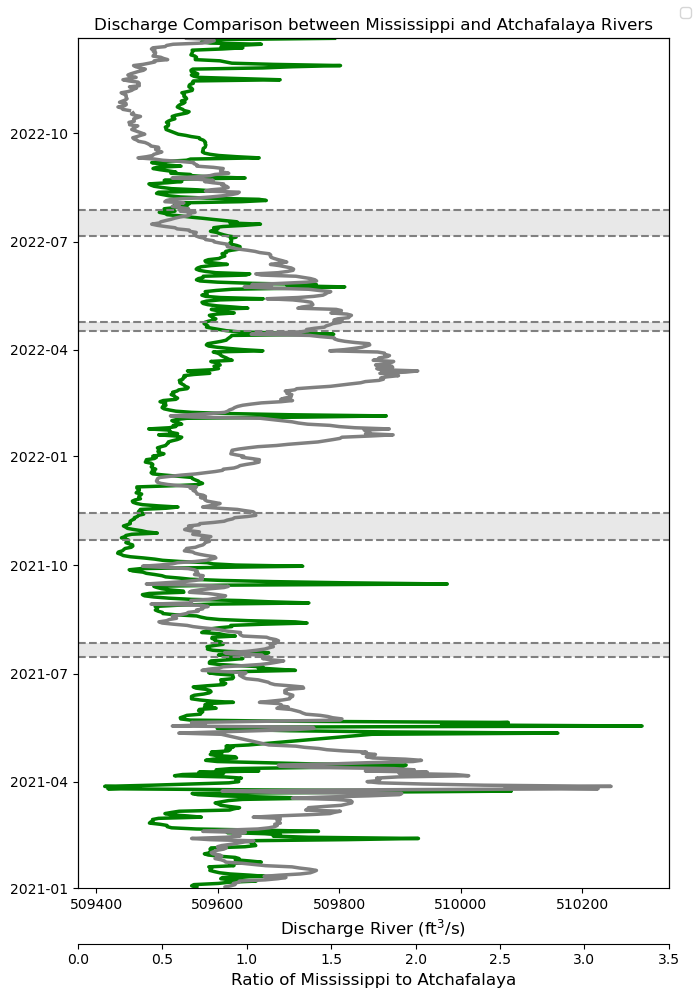

In [22]:
import matplotlib.pyplot as plt

# Create figure and primary x-axis
fig, ax1 = plt.subplots(figsize=(7, 10))

# Plot Discharge on the primary x-axis for Mississippi River
ax1.plot(df_ratio['total_dis'], df_ratio['datetime'], label='Mississippi River Discharge', color='green', linewidth=2.5)
ax1.set_xlabel('Discharge River ($\mathrm{ft^3/s}$)', fontsize=12)


# Create 3rd x-axis for ratio
ax3 = ax1.twiny()
ax3.plot(df_ratio['ratio_norm'], df_ratio['datetime'], label='Ratio of Mississippi to Atchafalaya', color='grey', linewidth=2.5)
ax3.set_xlabel('Ratio of Mississippi to Atchafalaya', fontsize=12)

# Set limits for both x-axes
#ax1.set_xlim(df_ratio['total_dis'].min()*0.9, df_ratio['total_dis'].max()*1.1)
#ax2.set_xlim(df_af['Discharge'].min()*0.9, df_af['Discharge'].max()*1.1)
ax3.set_xlim(0,3.5)

# Set limits for y-axis based on data
ax1.set_ylim(df_ratio['datetime'].min(), df_ratio['datetime'].max())

# Move spines to the bottom
ax3.xaxis.set_ticks_position('bottom')
ax3.xaxis.set_label_position('bottom')
ax3.spines['bottom'].set_position(('outward', 40))

##ax3.xaxis.set_ticks_position('bottom')
##ax3.xaxis.set_label_position('bottom')
#ax3.spines['bottom'].set_position(('outward', 80))

# Add horizontal lines for important dates
important_dates = [
    '2021-07-15', '2021-07-27', '2021-10-22', '2021-11-14',
    '2022-04-17', '2022-04-24', '2022-07-06', '2022-07-28'
]

for date in important_dates:
    ax1.axhline(y=pd.to_datetime(date), color='grey', linestyle='--')

# Shade the area between the two dates with transparent light grey
ax1.axhspan(pd.to_datetime('2021-07-15'), pd.to_datetime('2021-07-27'), facecolor='lightgrey', alpha=0.5)
ax1.axhspan(pd.to_datetime('2021-10-22'), pd.to_datetime('2021-11-14'), facecolor='lightgrey', alpha=0.5)
ax1.axhspan(pd.to_datetime('2022-04-17'), pd.to_datetime('2022-04-24'), facecolor='lightgrey', alpha=0.5)
ax1.axhspan(pd.to_datetime('2022-07-06'), pd.to_datetime('2022-07-28'), facecolor='lightgrey', alpha=0.5)

# Title and legend
plt.title('Discharge Comparison between Mississippi and Atchafalaya Rivers')
fig.tight_layout()  # Adjust layout for better spacing
fig.legend('')
plt.show()

# Save the figure
fig.savefig('../Dissertation_projects/Figures/OSM_figures/discharge_plot_ratio_flipped.png')


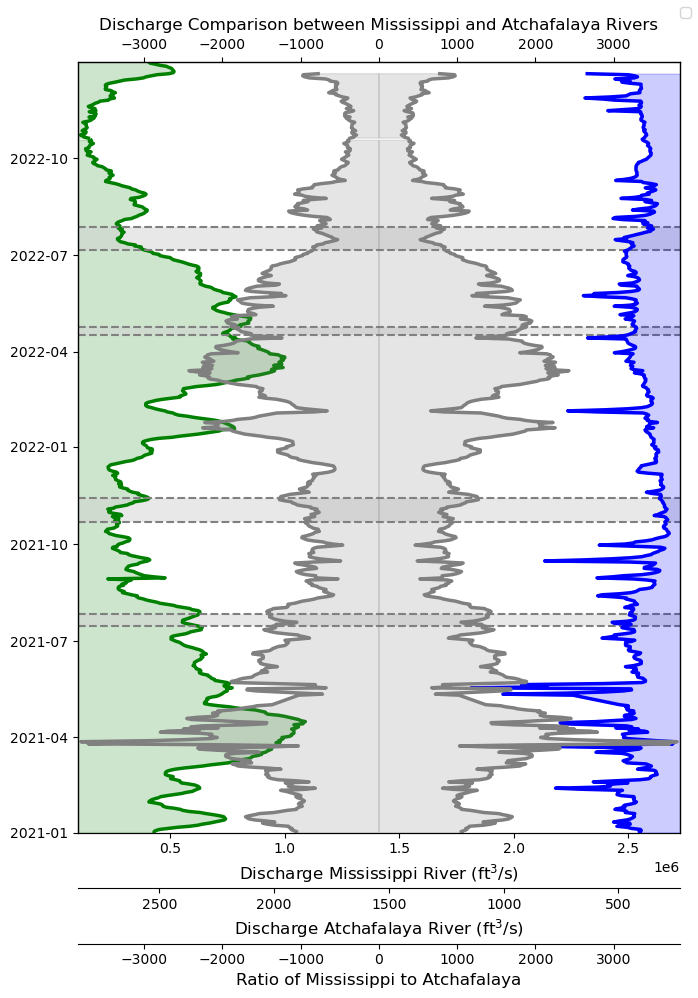

In [23]:
import matplotlib.pyplot as plt

# Create figure and primary x-axis
fig, ax1 = plt.subplots(figsize=(7, 10))

# Plot Discharge on the primary x-axis for Mississippi River
ax1.plot(df_mi['Discharge'], df_mi['datetime'], label='Mississippi River Discharge', color='green', linewidth=2.5)
ax1.set_xlabel('Discharge Mississippi River ($\mathrm{ft^3/s}$)', fontsize=12)
ax1.fill_betweenx(df_mi['datetime'], df_mi['Discharge'], color='green', alpha=0.2)


# Create secondary x-axis for Atchafalaya River
ax2 = ax1.twiny()
ax2.plot(df_af['Discharge'], df_af['datetime'], label='Atchafalaya River Discharge', color='blue', linewidth=2.5)
ax2.set_xlabel('Discharge Atchafalaya River ($\mathrm{ft^3/s}$)', fontsize=12)
ax2.fill_betweenx(df_af['datetime'], df_af['Discharge'], color='blue', alpha=0.2)

# Create 3rd x-axis for ratio
ax3 = ax1.twiny()
ax3.plot(df_ratio['ratio'], df_ratio['datetime'], label='Ratio of Mississippi to Atchafalaya', color='grey', linewidth=2.5)

ax4 = ax1.twiny()
ax4.plot(df_ratio['ratio']*-1, df_ratio['datetime'], label='Ratio of Mississippi to Atchafalaya', color='grey', linewidth=2.5)

ax3.fill_betweenx(df_ratio['datetime'], df_ratio['ratio'], color='grey', alpha=0.2)
ax4.fill_betweenx(df_ratio['datetime'], df_ratio['ratio']*-1, color='grey', alpha=0.2)


ax3.set_xlabel('Ratio of Mississippi to Atchafalaya', fontsize=12)

# Set limits for both x-axes
ax1.set_xlim(df_mi['Discharge'].min()*0.9, df_mi['Discharge'].max()*2.5)
ax2.set_xlim( df_af['Discharge'].max()*2.5, df_af['Discharge'].min()*0.9,)
ax3.set_xlim(-df_ratio['ratio'].max()*1.01, df_ratio['ratio'].max()*1.01)
ax4.set_xlim(-df_ratio['ratio'].max()*1.01, df_ratio['ratio'].max()*1.01)


# Set limits for y-axis based on data
ax1.set_ylim(df_mi['datetime'].min(), df_mi['datetime'].max())

# Move spines to the bottom
ax2.xaxis.set_ticks_position('bottom')
ax2.xaxis.set_label_position('bottom')
ax2.spines['bottom'].set_position(('outward', 40))

ax3.xaxis.set_ticks_position('bottom')
ax3.xaxis.set_label_position('bottom')
ax3.spines['bottom'].set_position(('outward', 80))

# Add horizontal lines for important dates
important_dates = [
    '2021-07-15', '2021-07-27', '2021-10-22', '2021-11-14',
    '2022-04-17', '2022-04-24', '2022-07-06', '2022-07-28'
]

for date in important_dates:
    ax1.axhline(y=pd.to_datetime(date), color='grey', linestyle='--')

# Shade the area between the two dates with transparent light grey
ax1.axhspan(pd.to_datetime('2021-07-15'), pd.to_datetime('2021-07-27'), facecolor='lightgrey', alpha=0.5)
ax1.axhspan(pd.to_datetime('2021-10-22'), pd.to_datetime('2021-11-14'), facecolor='lightgrey', alpha=0.5)
ax1.axhspan(pd.to_datetime('2022-04-17'), pd.to_datetime('2022-04-24'), facecolor='lightgrey', alpha=0.5)
ax1.axhspan(pd.to_datetime('2022-07-06'), pd.to_datetime('2022-07-28'), facecolor='lightgrey', alpha=0.5)

# Title and legend
plt.title('Discharge Comparison between Mississippi and Atchafalaya Rivers')
fig.tight_layout()  # Adjust layout for better spacing
fig.legend('')
plt.show()

# Save the figure
fig.savefig('../Dissertation_projects/Figures/OSM_figures/discharge_plot_ratio_flipped.png')


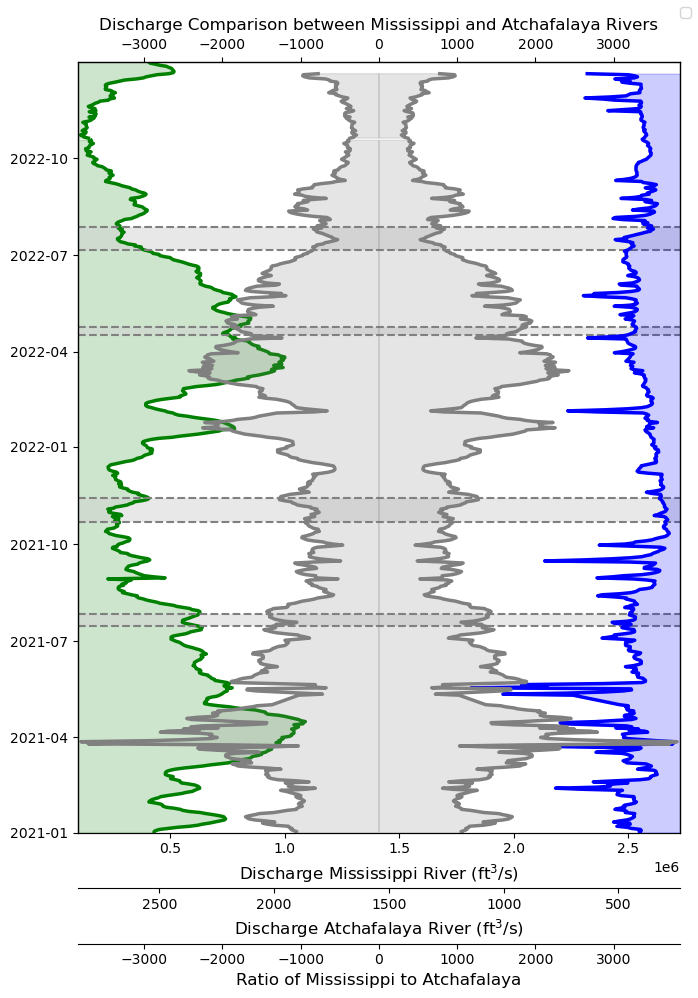

In [23]:
import matplotlib.pyplot as plt

# Create figure and primary x-axis
fig, ax1 = plt.subplots(figsize=(7, 10))

# Plot Discharge on the primary x-axis for Mississippi River
ax1.plot(df_mi['Discharge'], df_mi['datetime'], label='Mississippi River Discharge', color='green', linewidth=2.5)
ax1.set_xlabel('Discharge Mississippi River ($\mathrm{ft^3/s}$)', fontsize=12)
ax1.fill_betweenx(df_mi['datetime'], df_mi['Discharge'], color='green', alpha=0.2)


# Create secondary x-axis for Atchafalaya River
ax2 = ax1.twiny()
ax2.plot(df_af['Discharge'], df_af['datetime'], label='Atchafalaya River Discharge', color='blue', linewidth=2.5)
ax2.set_xlabel('Discharge Atchafalaya River ($\mathrm{ft^3/s}$)', fontsize=12)
ax2.fill_betweenx(df_af['datetime'], df_af['Discharge'], color='blue', alpha=0.2)

# Create 3rd x-axis for ratio
ax3 = ax1.twiny()
ax3.plot(df_ratio['ratio'], df_ratio['datetime'], label='Ratio of Mississippi to Atchafalaya', color='grey', linewidth=2.5)

ax4 = ax1.twiny()
ax4.plot(df_ratio['ratio']*-1, df_ratio['datetime'], label='Ratio of Mississippi to Atchafalaya', color='grey', linewidth=2.5)

ax3.fill_betweenx(df_ratio['datetime'], df_ratio['ratio'], color='grey', alpha=0.2)
ax4.fill_betweenx(df_ratio['datetime'], df_ratio['ratio']*-1, color='grey', alpha=0.2)


ax3.set_xlabel('Ratio of Mississippi to Atchafalaya', fontsize=12)

# Set limits for both x-axes
ax1.set_xlim(df_mi['Discharge'].min()*0.9, df_mi['Discharge'].max()*2.5)
ax2.set_xlim( df_af['Discharge'].max()*2.5, df_af['Discharge'].min()*0.9,)
ax3.set_xlim(-df_ratio['ratio'].max()*1.01, df_ratio['ratio'].max()*1.01)
ax4.set_xlim(-df_ratio['ratio'].max()*1.01, df_ratio['ratio'].max()*1.01)


# Set limits for y-axis based on data
ax1.set_ylim(df_mi['datetime'].min(), df_mi['datetime'].max())

# Move spines to the bottom
ax2.xaxis.set_ticks_position('bottom')
ax2.xaxis.set_label_position('bottom')
ax2.spines['bottom'].set_position(('outward', 40))

ax3.xaxis.set_ticks_position('bottom')
ax3.xaxis.set_label_position('bottom')
ax3.spines['bottom'].set_position(('outward', 80))

# Add horizontal lines for important dates
important_dates = [
    '2021-07-15', '2021-07-27', '2021-10-22', '2021-11-14',
    '2022-04-17', '2022-04-24', '2022-07-06', '2022-07-28'
]

for date in important_dates:
    ax1.axhline(y=pd.to_datetime(date), color='grey', linestyle='--')

# Shade the area between the two dates with transparent light grey
ax1.axhspan(pd.to_datetime('2021-07-15'), pd.to_datetime('2021-07-27'), facecolor='lightgrey', alpha=0.5)
ax1.axhspan(pd.to_datetime('2021-10-22'), pd.to_datetime('2021-11-14'), facecolor='lightgrey', alpha=0.5)
ax1.axhspan(pd.to_datetime('2022-04-17'), pd.to_datetime('2022-04-24'), facecolor='lightgrey', alpha=0.5)
ax1.axhspan(pd.to_datetime('2022-07-06'), pd.to_datetime('2022-07-28'), facecolor='lightgrey', alpha=0.5)

# Title and legend
plt.title('Discharge Comparison between Mississippi and Atchafalaya Rivers')
fig.tight_layout()  # Adjust layout for better spacing
fig.legend('')
plt.show()

# Save the figure
fig.savefig('../Dissertation_projects/Figures/OSM_figures/discharge_plot_ratio_flipped.png')
